In [1]:
from src.utils import Verbalizer
from src.template import ManualTemplate
from src.pipeline import PromptForClassification
from transformers import BertConfig, BertForMaskedLM, BertTokenizer
from transformers import AutoTokenizer, AutoModel
from openprompt.data_utils import InputExample
from openprompt import PromptDataLoader
import torch

In [2]:
import pandas as pd
phenotype=pd.read_csv("phenotype_input.csv")
phenotype.head()

,Text,Labels
0,am abdomen u s co...,CHRONIC.NEUROLOGICAL.DYSTROPHIES
1,am chest portable ...,ADVANCED.LUNG.DISEASE
2,am chest portable ...,CHRONIC.NEUROLOGICAL.DYSTROPHIES
3,am chest port line...,ADVANCED.HEART.DISEASE
4,am mra brain w o con...,CHRONIC.NEUROLOGICAL.DYSTROPHIES


In [3]:
phenotype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    347 non-null    object
 1   Labels  347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


<AxesSubplot:>

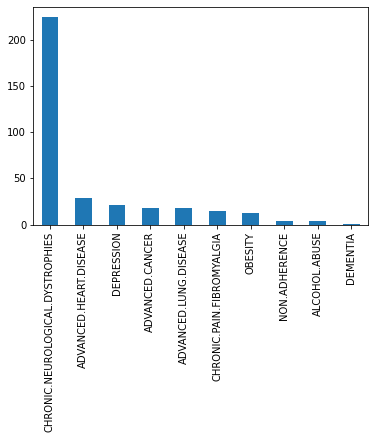

In [4]:
phenotype["Labels"].value_counts().plot(kind='bar')

In [5]:
# phenotype["DESCRIPTION"].value_counts().plot(kind='bar')

In [6]:
phenotype["Text"].iloc[2]

'                        am   chest   portable ap                                               clip       clip number   radiology             reason   ngt placement and poor resp effort                                                                                      hospital       medical condition           year old man with hep c   cri   dm   now with delta ms     reason for this examination     ngt placement and poor resp effort                                                                                                                   final report   indication       y o man with hepatitis c   chronic renal insufficiency    diabetes mellitus   presenting with change in mental status and poor   respiratory effort    assessment for ng tube placement requested     comparison    pa    lateral chest x ray of                     technique    supine ap portable chest x ray     findings    there has been interval placement of an et tube located      cm from   the carina    there i

In [8]:
phenotype_df=phenotype
phenotype_df.shape

(347, 2)

# Datset

In [12]:
df=phenotype_df
df.columns=["Text","Labels"]
df.Labels.value_counts()

CHRONIC.NEUROLOGICAL.DYSTROPHIES    224
ADVANCED.HEART.DISEASE               29
DEPRESSION                           21
ADVANCED.CANCER                      18
ADVANCED.LUNG.DISEASE                18
CHRONIC.PAIN.FIBROMYALGIA            15
OBESITY                              13
NON.ADHERENCE                         4
ALCOHOL.ABUSE                         4
DEMENTIA                              1
Name: Labels, dtype: int64

# TEXT Cleaning

In [13]:
data=df
# # remove NULL Values from data
# data = data[pd.notnull(data['Text'])]
data.shape

(347, 2)

<AxesSubplot:ylabel='Frequency'>

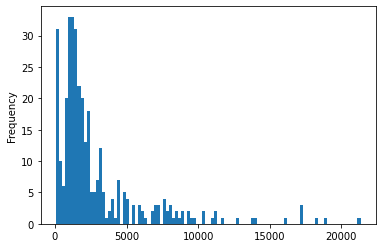

In [14]:
import matplotlib.pyplot as plt
data['len'] = data['Text'].apply(lambda s : len(s))
data['len'].plot.hist(bins=100)

In [15]:
data.len.quantile(0.9)

7382.200000000011

In [16]:
import re
# def clean_txt(text):
#     text = re.sub("'", "",text)
#     text=re.sub("(\\W)+"," ",text)
#     return text

#tokenization
import string
import spacy
tok = spacy.load('en_core_web_sm')
def tokenize (text):
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]') # remove punctuation and numbers
    nopunct = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(nopunct)]
def join_words(text):
    return ' '.join(word for word in text)

In [17]:
data["Text"]= data["Text"].apply(tokenize)
data["Text"]=data["Text"].apply(join_words)
data

,Text,Labels,len
0,am abdomen u s ...,CHRONIC.NEUROLOGICAL.DYSTROPHIES,1287
1,am chest portab...,ADVANCED.LUNG.DISEASE,1398
2,am chest portab...,CHRONIC.NEUROLOGICAL.DYSTROPHIES,1565
3,am chest port l...,ADVANCED.HEART.DISEASE,1953
4,am mra brain w o c...,CHRONIC.NEUROLOGICAL.DYSTROPHIES,5468
...,...,...,...
342,tp art bp over sys off neo hc...,ADVANCED.HEART.DISEASE,119
343,w discharged from hospital m...,ADVANCED.LUNG.DISEASE,948
344,micu npn events difficult iv a...,DEPRESSION,2202
345,am abdomen supine...,CHRONIC.NEUROLOGICAL.DYSTROPHIES,822


In [18]:
x_test=data.Text.to_list()
y_test=data.Labels.to_list()
x_test[0].__class__
y_test[0].__class__

str

# PLMs

In [24]:

from transformers import BertConfig, BertForMaskedLM, BertTokenizer

In [25]:
plms._MODEL_CLASSES['bert'] = plms.ModelClass(**{
    'config': BertConfig,
    'tokenizer': BertTokenizer,
    'model':BertForMaskedLM,
    'wrapper': MLMTokenizerWrapper,
})

# HealthPrompt


In [121]:

def prompt_classification(text):
    classes = ['ADVANCED.HEART.DISEASE', 
               'CHRONIC.PAIN.FIBROMYALGIA',
               'ADVANCED.LUNG.DISEASE',
               'ALCOHOL.ABUSE',
               'CHRONIC.NEUROLOGICAL.DYSTROPHIES',
               'DEVELOPMENTAL.DELAY.RETARDATION', 
               'DEMENTIA',
               'DEPRESSION', 
               'ADVANCED.CANCER',
               'SCHIZOPHRENIA.AND.OTHER.PSYCHIATRIC.DISORDERS',
               'OBESITY',
              'OTHER.SUBSTANCE.ABUSE']
#     print(text)

    dataset = [ 
          InputExample(
    #         guid = 0,
            text_a =text
#               "Asthma affects lungs  and can be hard to diagnose. The signs of asthma can seem like the signs of COPD, pneumonia, bronchitis, pulmonary embolism, anxiety, and heart disease.", #lung
        ),
    ]


#     plm, tokenizer, model_config, WrapperClass = load_plm_fn()
 
#     template_text = '{"placeholder":"text_a"}. Disease : {"mask"}'
#     template_text = '{"placeholder":"text_a"}: This effects {"mask"}'
#     template_text= '{"placeholder": "text_a"} :  {"mask"} disorder'
    template_text = '{"placeholder":"text_a"}: {"mask"} type of disease'

    promptTemplate = ManualTemplate(
                                    #model = plm, 
                                     tokenizer = tokenizer, 
                                     text = template_text, 
#                                      prompt_encoder_type = 'mlm'
    )

    promptVerbalizer = ManualVerbalizer(
        classes = classes,
        label_words = { 
            'ADVANCED.HEART.DISEASE':['heart','cardio'], 
            'CHRONIC.PAIN.FIBROMYALGIA':['fibromyalgia','muscle'],
            'ADVANCED.LUNG.DISEASE':['lung''bronchi'],
            'ALCOHOL.ABUSE':['alcohol'],
            'CHRONIC.NEUROLOGICAL.DYSTROPHIES':['neurology','neuro'],
            'DEVELOPMENTAL.DELAY.RETARDATION':['mental retardation','retardation'], 
            'DEMENTIA': ['dementia','brain','memory'],
            'DEPRESSION':['depression'], 
            'ADVANCED.CANCER':['cancer','oncology','onco'],
            'SCHIZOPHRENIA.AND.OTHER.PSYCHIATRIC.DISORDERS':['psychiatry', 'schizophrenia'],
            'OBESITY':['obesity','overweight'],
            'OTHER.SUBSTANCE.ABUSE':["abuse","tobacco"]
        },
        tokenizer = tokenizer,
    )

    promptModel = PromptForClassification(
        template = promptTemplate,
        plm = plm,
        verbalizer = promptVerbalizer
    )


    data_loader = PromptDataLoader(
        dataset = dataset,
        tokenizer = tokenizer, 
        template = promptTemplate, 
        tokenizer_wrapper_class=WrapperClass,
        max_seq_length=256, decoder_max_length=3, 
        batch_size=1,shuffle=False, teacher_forcing=False, predict_eos_token=False,
        truncate_method="head"
    )

    promptModel.eval()
    with torch.no_grad():
        for batch in data_loader:
            logits = promptModel(batch)
#             print(logits)
            preds = torch.argmax(logits, dim = -1)
#             print(classes[preds])
            
    return classes[preds]




In [122]:
#if __name__ == "__main__":
    
#     st.title("HealthPrompt: Classifying clinical texts")
#     st.write("Upload Clinical text, Classify it..")

#     @st.cache(allow_output_mutation=True)
def load_plm_fn():
#         plm, tokenizer, model_config, WrapperClass = load_plm("bert", "bert-base-uncased")
#         plm, tokenizer, model_config, WrapperClass = load_plm("bert", "emilyalsentzer/Bio_ClinicalBERT")
#        plm, tokenizer, model_config, WrapperClass = load_plm("bert", "mrm8488/bioclinicalBERT-finetuned-covid-papers")
#         plm, tokenizer, model_config, WrapperClass = load_plm("bert", "dmis-lab/biobert-v1.1")
#         plm, tokenizer, model_config, WrapperClass = load_plm("roberta", "roberta-large")
#         plm, tokenizer, model_config, WrapperClass = load_plm("gpt2", "gpt2")
        plm, tokenizer, model_config, WrapperClass = load_plm("t5", "t5-base")
    
        return plm, tokenizer, model_config, WrapperClass
    
#     with st.spinner("Loading PLM into memory..."):
plm, tokenizer, model_config, WrapperClass = load_plm_fn()
        
#     text = st.text_input('Enter the clinical text here: ')
        
#     if text:
#         st.write("Response: ")
#         with st.spinner("Searching for classes.."):
#             res=prompt_classification(text)
#             st.write("Class : {} - disease".format(res))
#         st.write("")

# res=prompt_classification(text)

In [123]:
# text='mr. [**known lastname ####**] is a ## year old male with past medical history significant\n   for cad s/p cabg and pci to lcx, aortic stenosis, vt/vf arrest s/p icd,\n   chf (ef ##%) s/p biv pacer, afib on coumadin, cri and diverticulosis\n   who was admitted on [**3-8**] with nausea, vomiting, abdominal pain and\n   elevated lipase.  he was treated with bowel rest.  diet was slowly\n   advanced over last day. he ruled out for acute cardiac event.\n   [**3-##**] am he ambulated around the unit with the nurse and was reportedly\n   feeling well.  became lighthead while on the toilet and was noted to be\n   in vt on telemetry, lost consciousness upon return to bed -> code blue\n   called: pulseless vt- cpr with 4 shocks, 4mg of epinephrine, amiodarone\n   ###mg x 2, lidocaine ###mg x 1, magnesium 2mg, bicarb 1 amp, and\n   calcium. interrogation of ppm during code noted to be in and out of vt,\n   below the rate of detection, with intermittent switch to non-perfusing\n   sinus rhythm. successfully paced out of vt several times but with\n   subsequent return to vt.  lidocaine and amiodarone gtts were started\n   and the patient was successfully paced out of his vt back to an\n   electronically paced rhythm.  an echocardiogram was done during the\n   code which showed global hypokinesis, no evidence of pericardial\n   effusion. to ccu for further care. intubated for airway protection on\n   amio and lido gtt\ns overnight.  extubated am of [**####-3-##**]. episode vt\n   overnight [**3-##**] at 2 am and 6am  requiring total of 5 icd shocks, now\n   back on amiodarone gtt overlapping w/ po amiodarone and also on\n   mexilitene po.\n   [**date range (1) ####**] overnight: 2 episodes vt. 1^st episode sustained at rate of ###\n   from #### am-####am- no shock delivered by icd and patient remained\n   hemodynamically stable. 2^nd episode at 2 am, briefer run of vt and atp\n   functioning paced patient out of rhythm without a shock.\n   [**date range (1) ####**]: overnite 2 episodes of vt rate ###s\n attempt to pace\n then\n   rate ###s w/ 2 shocks\n started back on lidocaine gtt after bolus.\n   3/7a- mexilitine d/c\nd while pt on lidocaine gtt. cont on amio po and\n   lido gtt. lido gtt decreased at 6pm (pt becoming more confused.)\n   started on lasix gtt for further diuresis. plan for eps + vt ablation\n   on monday. ep suggesting to keep pt comfortable, w/ pain under control\n   and more sedated/less anxious this weekend as his anxiety and pain\n   increases likelihood of having a vt episode/shock.\n   [**date range (1) ####**]- pt developed 2 more episodes of vt- attempting to id pace but\n   not successful- shocked x 2 once rate ###-###. pt very anxious and\n   weepy with repeat episodes of vt given ativan 0.5 mg ivp. pain under\n   control w iv dilaudid and po percocet. pt given lido ### mg and\n   increased gtt back up to 2 mg.\n   3/8am-changed to iv amiodarone @ 0.5mg/min, con\nt on lido@2mg/min. hr\n   elevated to ###s w/ anxiety, multiple doses of ativan ivp given to help\n   pt relax and decrease hr. code status changed to dnr\n no cpr,\n   externally defibrillate x 1.\n   code status: dnr\n no cpr\n may externally defibrillate x 1 if icd\n   ineffective (per dr [**first name (stitle) **].\n   cardiac dysrhythmia other\n   assessment:\n   pt admitted to ccu s/p vt arrest remains with episodic vt even on lido\n   gtt, po amio, sedation prn.\n   action:\n   diuresis: lasix gtt ##mg/hr decreased to 7mg/hr  late morning, but\n   increased again back to ##mg/hr this afternoon after receiving a lot of\n   po intake and noting some increased sob/audible crackles.\n   rhythm: amio po d/c\nd and pt placed on amiodarone gtt 0.5mg/min.\n   dr [**first name (stitle) **] saw pt around ####am then pt having increased anxiety\n   ###s (which typically precedes his vt/shock)\n dr [**first name (stitle) **] recommended\n   sedating pt as much as possible with ativan\n even if it means having\n   to intubate him for airway protection\n and pt will probably be\n   intubated tomorrow for cath anyways. given 2.5mg iv ativan over ##min\n   finally breaking avpaced rhythm of ### back to ##s.  family visiting\n   all afternoon\n hr up again to ###s\n given total of another 2mg ativan\n   over an hour\n hr breaking at times to ##s, then back up to ###s, some\n   pvcs noted, pm lytes drawn since pt is being diuresed on lasix gtt.\n   code status: pt now dnr\n no cpr\n may externally defibrillate x 1.\n   response:\n   awaiting pm lytes. family visiting all afternoon, updated on\n   status/care.\n   plan:\n   . replete lytes.  continue to aggressively diurese/neb tx. continue to\n   control anxiety/pain as able with support/pain meds. cath in am. npo\n   after midnite. possible eps on tuesday.\n   pain control (acute pain, chronic pain)\n   assessment:\n   pt with anxiety and pain in setting of regular shocking and repeat vt\n   episodes and s/p cpr. pt shocked twice overnite. pt very upset\n and is\n   slightly confused, but always worried he is going to get shocked again.\n   pain in lt chest\n increases w/ deep breaths, coughing and moving.\n   action:\n   given percocet 2 tabs for pain this morning and again this afternoon 2\n   tabs.\n   response:\n   relief obtained from left chest pain (fractured ribs) with 2 percocets.\n   plan:\n   continue ativan as needed as well as dilaudid and percocet for anxiety\n   and pain control. keep pt free of anxiety and pain.\n'

# prompt_classification(text)
# prompt_classification_weighted(text)

In [124]:
import collections
import nltk
nltk.download('punkt')

def get_split(text1):
    l_total = []
    l_parcial = []
    if len(text1.split())//100 >0:
        n = len(text1.split())//100
    else: 
        n = 1
    for w in range(n):
        if w == 0:
                l_parcial = text1.split()[:150]
                l_total.append(" ".join(l_parcial))
        else:
                l_parcial = text1.split()[w*100:w*100 + 150]
                l_total.append(" ".join(l_parcial))
    return l_total


def prompt_classification_weighted(text):

    #convert to list
    a_list = get_split(text)
    y_pred=[]
    for x  in a_list:
        pred_label=prompt_classification(x)
        y_pred.append(pred_label)
    
    label=max(y_pred, key = y_pred.count)
    ### code for total no of sentences
    no_of_sentenses=len(y_pred)
#     print(label)
    return label, no_of_sentenses
   

[nltk_data] Downloading package punkt to
[nltk_data]     /ihome/yanshanwang/sos86/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [126]:
y_pred=[]
global no_of_sentenses
total_no_of_sentenses=0
for x in x_test:
# for x  in a_list:
    pred_label,no_of_sentenses=prompt_classification_weighted(x)
#     print(x)
    y_pred.append(pred_label)
    total_no_of_sentenses=total_no_of_sentenses+no_of_sentenses
    
print(total_no_of_sentenses)    
y_pred.__len__()
y_test[1:2]
y_pred[1:2]


tokenizing: 1it [00:00, 392.32it/s]
tokenizing: 1it [00:00, 380.78it/s]
tokenizing: 1it [00:00, 393.61it/s]
tokenizing: 1it [00:00, 407.53it/s]
tokenizing: 1it [00:00, 441.69it/s]
tokenizing: 1it [00:00, 394.76it/s]
tokenizing: 1it [00:00, 405.76it/s]
tokenizing: 1it [00:00, 395.73it/s]
tokenizing: 1it [00:00, 406.62it/s]
tokenizing: 1it [00:00, 380.26it/s]
tokenizing: 1it [00:00, 391.55it/s]
tokenizing: 1it [00:00, 385.68it/s]
tokenizing: 1it [00:00, 459.40it/s]
tokenizing: 1it [00:00, 388.25it/s]
tokenizing: 1it [00:00, 393.02it/s]
tokenizing: 1it [00:00, 386.11it/s]
tokenizing: 1it [00:00, 387.07it/s]
tokenizing: 1it [00:00, 370.00it/s]
tokenizing: 1it [00:00, 376.64it/s]
tokenizing: 1it [00:00, 390.82it/s]
tokenizing: 1it [00:00, 381.20it/s]
tokenizing: 1it [00:00, 404.11it/s]
tokenizing: 1it [00:00, 418.43it/s]
tokenizing: 1it [00:00, 422.09it/s]
tokenizing: 1it [00:00, 456.20it/s]
tokenizing: 1it [00:00, 432.31it/s]
tokenizing: 1it [00:00, 416.18it/s]
tokenizing: 1it [00:00, 410.

1107


['CHRONIC.PAIN.FIBROMYALGIA']